In [87]:
library(DESeq2)
library(stringr)
library(ggplot2)

Source:
https://www.rdocumentation.org/packages/stringr/versions/0.6.2/topics/str_split_fixed

In [88]:
setwd("/home/alnour/h3bionet/")

In [89]:
counts=read.csv("counts.txt", sep="", head=T, skip=1, row.names = "Geneid")

In [90]:
colnames(counts)

[1] "Chr"                                                                            
 [2] "Start"                                                                          
 [3] "End"                                                                            
 [4] "Strand"                                                                         
 [5] "Length"                                                                         
 [6] "X.home.users_current.assesuser2.rna_practice.alignment.sample_37Aligned.out.bam"
 [7] "X.home.users_current.assesuser2.rna_practice.alignment.sample_38Aligned.out.bam"
 [8] "X.home.users_current.assesuser2.rna_practice.alignment.sample_39Aligned.out.bam"
 [9] "X.home.users_current.assesuser2.rna_practice.alignment.sample_40Aligned.out.bam"
[10] "X.home.users_current.assesuser2.rna_practice.alignment.sample_41Aligned.out.bam"
[11] "X.home.users_current.assesuser2.rna_practice.alignment.sample_42Aligned.out.bam"

In [91]:
samples=cbind(colnames(counts)[6:11],str_split_fixed(colnames(counts)[6:11],"_",3)[,2])

In [92]:
colnames(counts)[6:11]
colnames(counts)[6:11]=str_split_fixed(colnames(counts)[6:11],"alignment.",6)[,2]
colnames(counts)[6:11]=str_replace(colnames(counts)[6:11],"Aligned.out.bam", "")
colnames(counts)[6:11]
samples=cbind(colnames(counts)[6:11],str_split_fixed(colnames(counts)[6:11],"_",3)[,2])
rownames(samples)=samples[,1]
samples=as.data.frame(samples[,-1])
colnames(samples)="condition"

[1] "X.home.users_current.assesuser2.rna_practice.alignment.sample_37Aligned.out.bam"
[2] "X.home.users_current.assesuser2.rna_practice.alignment.sample_38Aligned.out.bam"
[3] "X.home.users_current.assesuser2.rna_practice.alignment.sample_39Aligned.out.bam"
[4] "X.home.users_current.assesuser2.rna_practice.alignment.sample_40Aligned.out.bam"
[5] "X.home.users_current.assesuser2.rna_practice.alignment.sample_41Aligned.out.bam"
[6] "X.home.users_current.assesuser2.rna_practice.alignment.sample_42Aligned.out.bam"

[1] "sample_37" "sample_38" "sample_39" "sample_40" "sample_41" "sample_42"

In [94]:
all(rownames(samples) %in% colnames(counts))

[1] TRUE

In [95]:
dds=DESeqDataSetFromMatrix(countData = counts[,6:11],colData = samples,design = ~ condition)

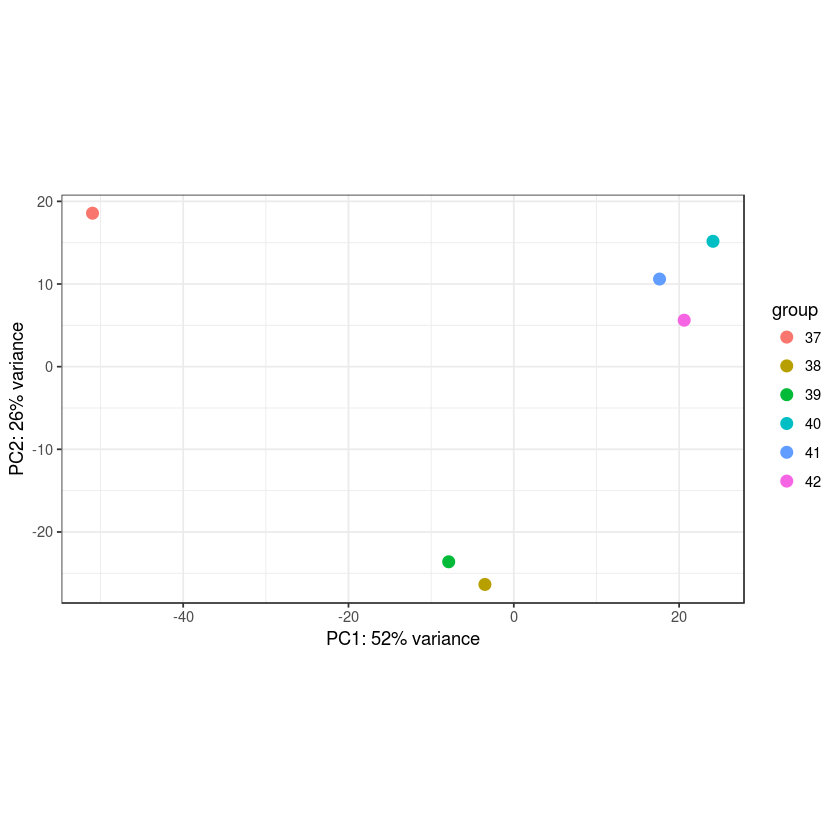

In [97]:
 plotPCA(rlog(dds), intgroup="condition")+theme_bw() 